In [5]:
import numpy as np 
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn import svm

In [6]:
df = pd.read_csv('loan_data.csv')

In [7]:
df.tail(10)

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
604,LP002959,Female,Yes,1,Graduate,No,12000,0.0,496.0,360.0,1.0,Semiurban,Y
605,LP002960,Male,Yes,0,Not Graduate,No,2400,3800.0,NaN,180.0,1.0,Urban,N
606,LP002961,Male,Yes,1,Graduate,No,3400,2500.0,173.0,360.0,1.0,Semiurban,Y
607,LP002964,Male,Yes,2,Not Graduate,No,3987,1411.0,157.0,360.0,1.0,Rural,Y
608,LP002974,Male,Yes,0,Graduate,No,3232,1950.0,108.0,360.0,1.0,Rural,Y
609,LP002978,Female,No,0,Graduate,No,2900,0.0,71.0,360.0,1.0,Rural,Y
610,LP002979,Male,Yes,3+,Graduate,No,4106,0.0,40.0,180.0,1.0,Rural,Y
611,LP002983,Male,Yes,1,Graduate,No,8072,240.0,253.0,360.0,1.0,Urban,Y
612,LP002984,Male,Yes,2,Graduate,No,7583,0.0,187.0,360.0,1.0,Urban,Y
613,LP002990,Female,No,0,Graduate,Yes,4583,0.0,133.0,360.0,0.0,Semiurban,N


<Axes: >

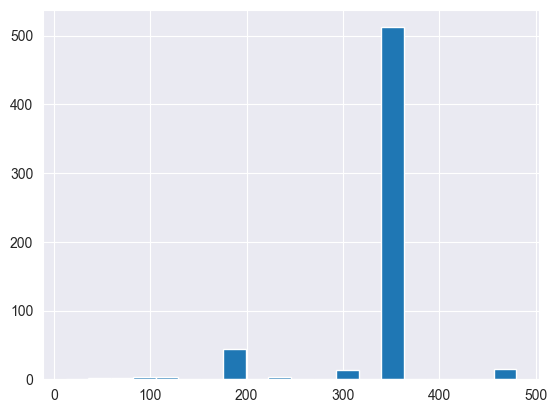

In [8]:
df['Loan_Amount_Term'].hist(bins=20)

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


In [10]:
df.isnull().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [11]:
df['TotalIncome'] = df['ApplicantIncome'] + df['CoapplicantIncome']

In [12]:
df['TotalIncome'] = df['ApplicantIncome'] + df['CoapplicantIncome']

<Axes: >

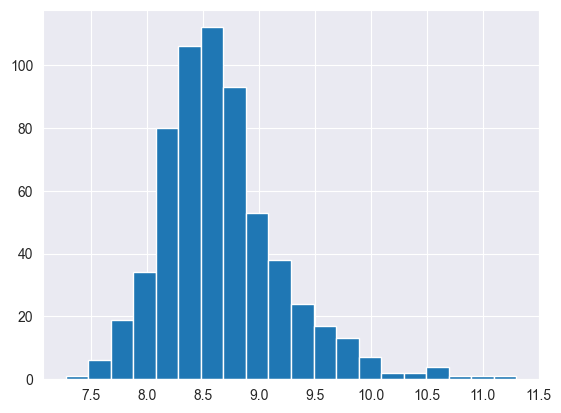

In [13]:
df['TotalIncome'] = df['ApplicantIncome'] + df['CoapplicantIncome']
df['TotalIncome_log'] = np.log(df['TotalIncome'])
df['TotalIncome_log'].hist(bins=20)

In [14]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 15 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
 13  TotalIncome        614 non-null    float64
 14  TotalIncome_log    614 non-null    float64
dtypes: float64(6), int64(1), object(8)
memory usage: 72.1+ KB


In [15]:
df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status,TotalIncome,TotalIncome_log
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y,5849.0,8.674026
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N,6091.0,8.714568
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y,3000.0,8.006368
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y,4941.0,8.505323
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y,6000.0,8.699515


In [16]:
df.isnull().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
TotalIncome           0
TotalIncome_log       0
dtype: int64

In [17]:
df['LoanAmount'] = df['LoanAmount'].fillna(df['LoanAmount'].mean())

In [18]:
df['Credit_History'] = df['Credit_History'].fillna(df['Credit_History'].mean())

In [19]:
df.isnull().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount            0
Loan_Amount_Term     14
Credit_History        0
Property_Area         0
Loan_Status           0
TotalIncome           0
TotalIncome_log       0
dtype: int64

In [20]:
df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status,TotalIncome,TotalIncome_log
0,LP001002,Male,No,0,Graduate,No,5849,0.0,146.412162,360.0,1.0,Urban,Y,5849.0,8.674026
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.000000,360.0,1.0,Rural,N,6091.0,8.714568
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.000000,360.0,1.0,Urban,Y,3000.0,8.006368
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.000000,360.0,1.0,Urban,Y,4941.0,8.505323
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.000000,360.0,1.0,Urban,Y,6000.0,8.699515


In [21]:
df.dropna(inplace=True)

In [22]:
df.isnull().sum()

Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
TotalIncome          0
TotalIncome_log      0
dtype: int64

In [23]:
df.shape

(542, 15)

-------Data Visualisation-------


<Axes: xlabel='Gender', ylabel='count'>

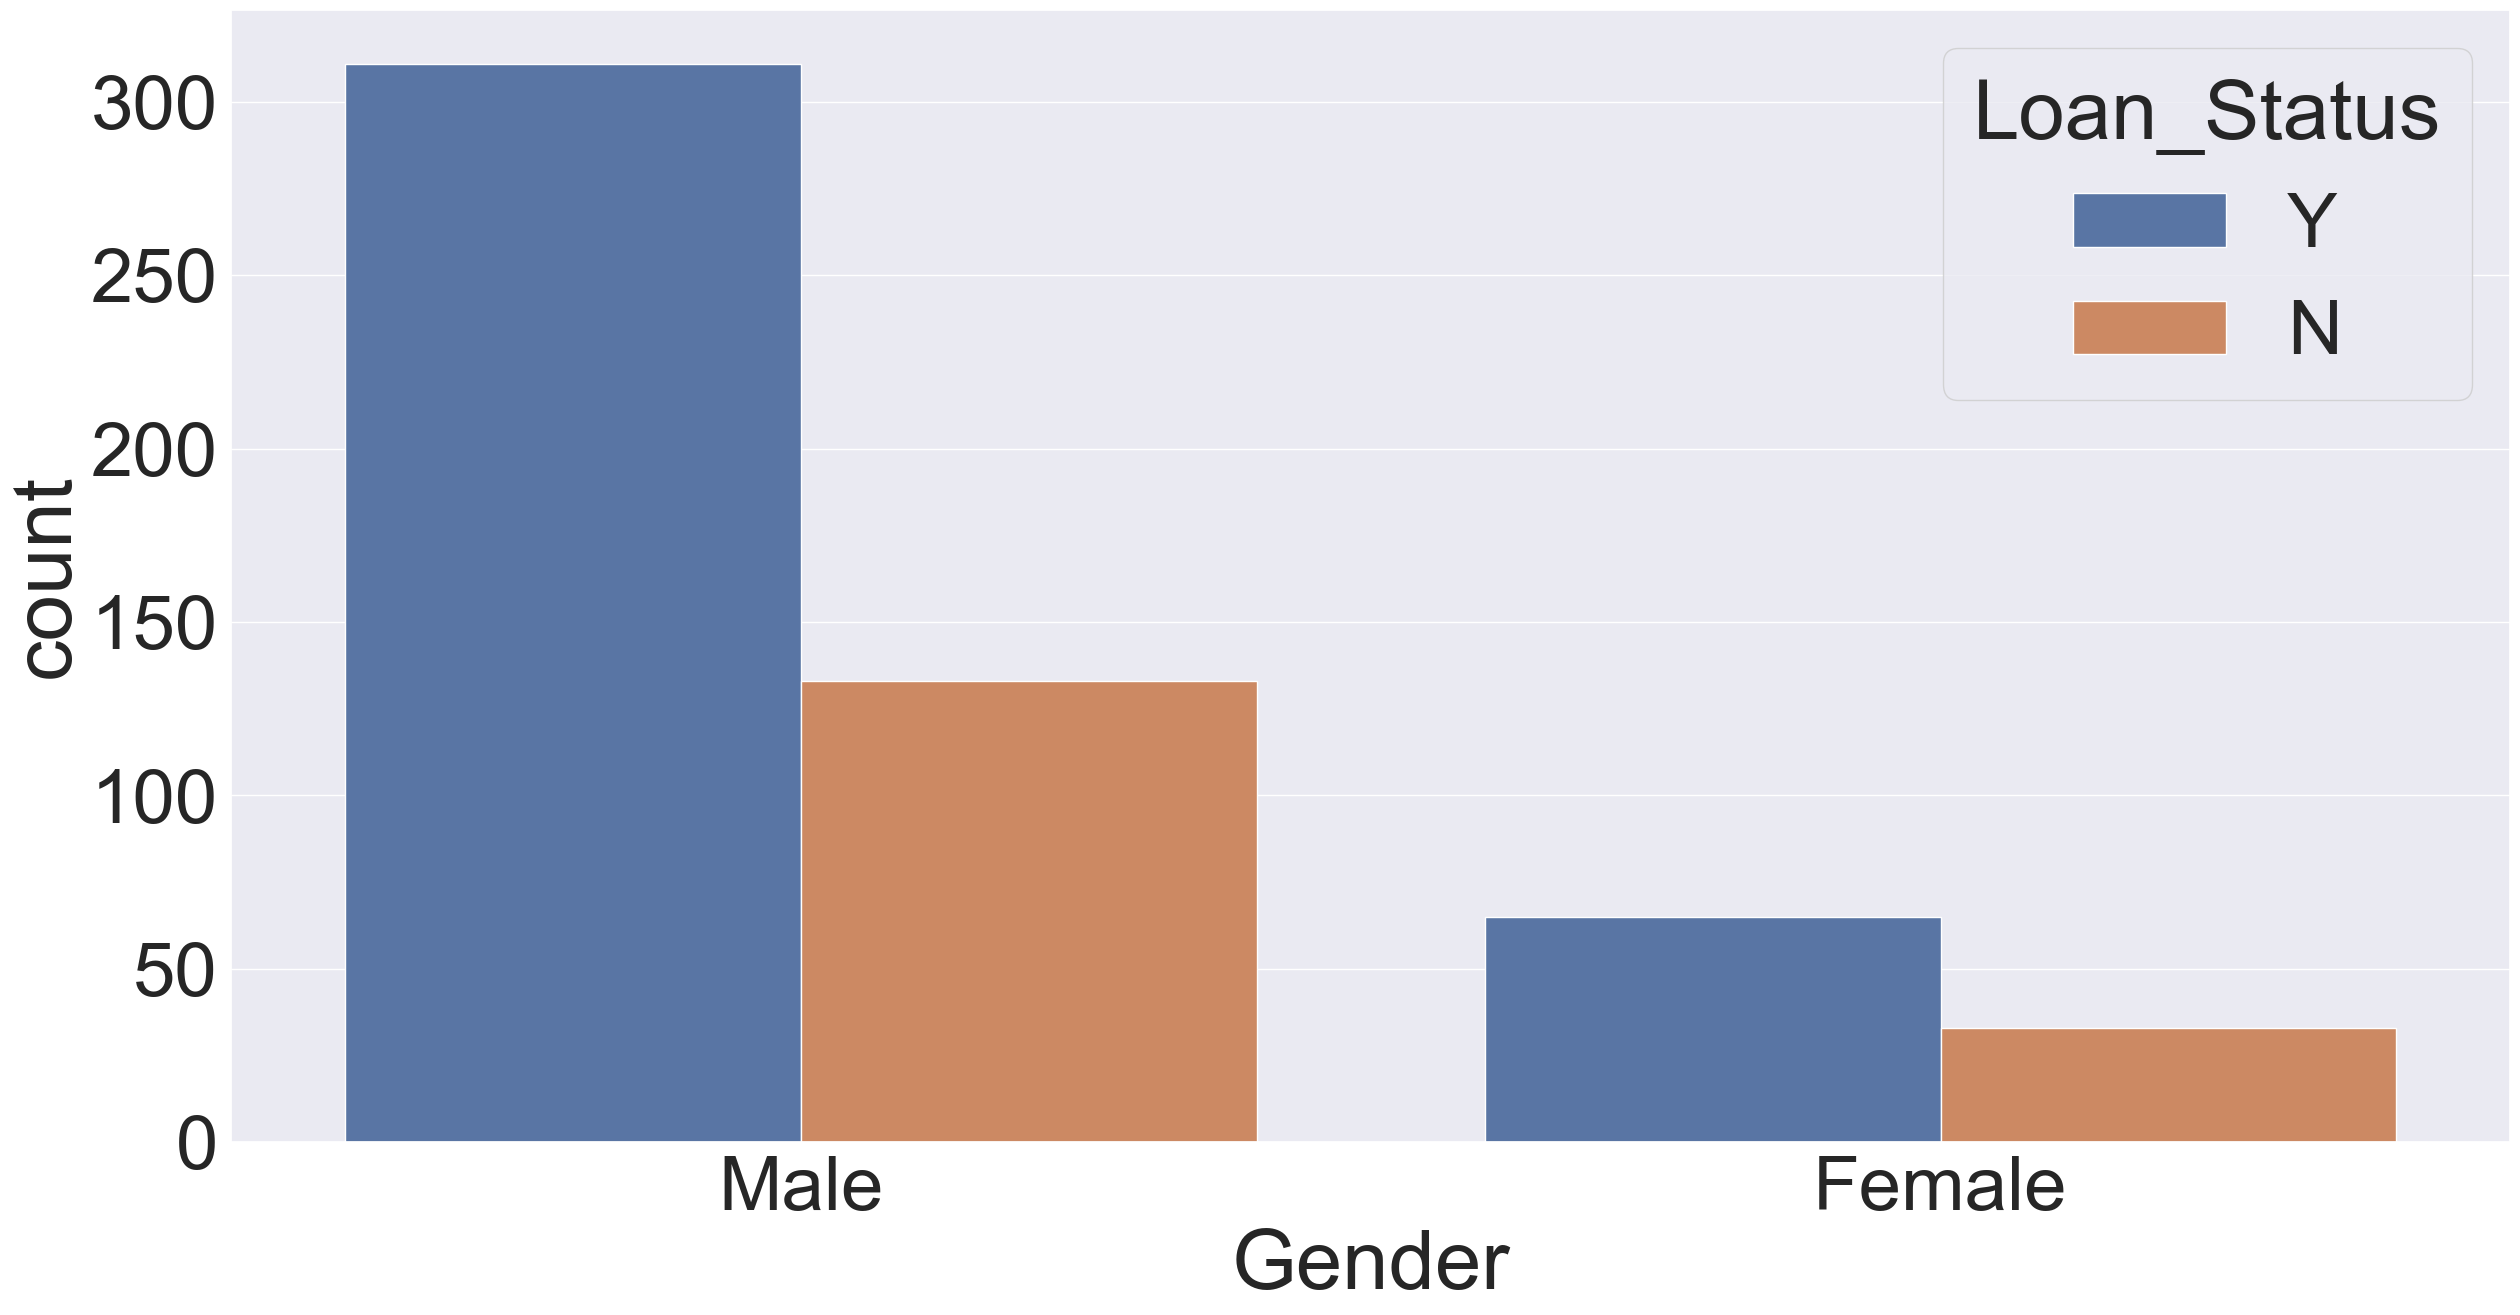

In [24]:
plt.figure(figsize = (100,50))
sns.set(font_scale=5)
plt.subplot(331)
sns.countplot(data=df,x='Gender',hue='Loan_Status')

<Axes: xlabel='Gender', ylabel='count'>

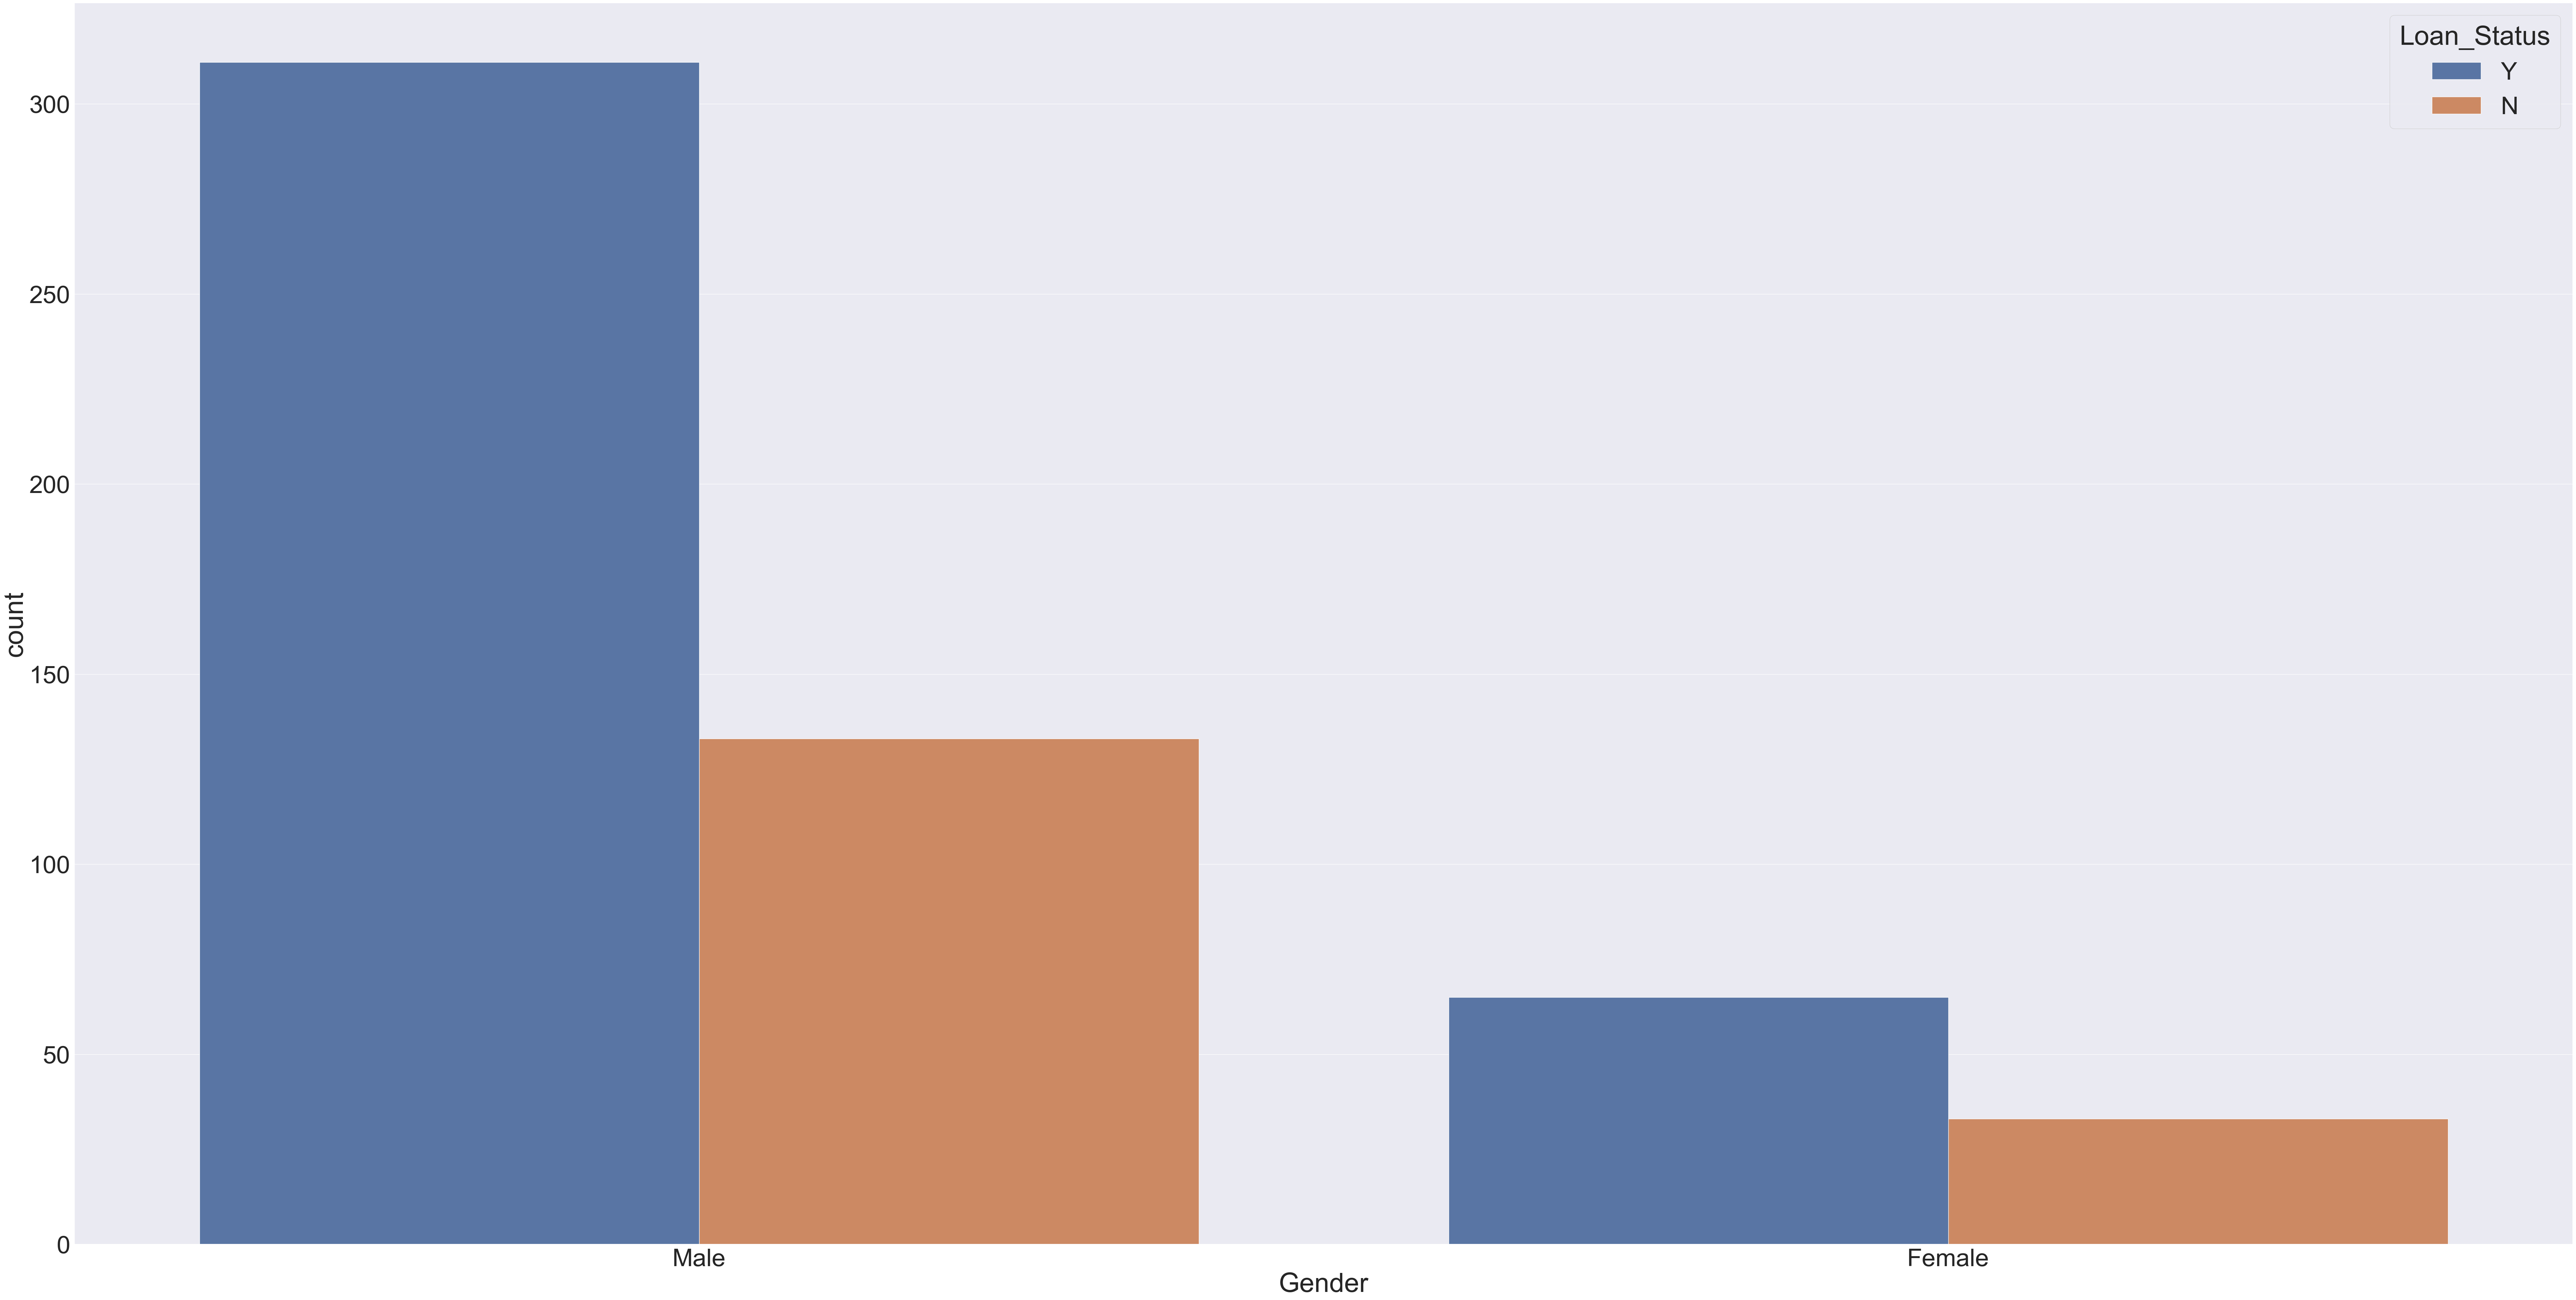

In [25]:
plt.figure(figsize = (100,50))
# sns.set(font_scale=5)
# plt.subplot(331)
sns.countplot(data=df,x='Gender',hue='Loan_Status')

<Axes: xlabel='Property_Area', ylabel='count'>

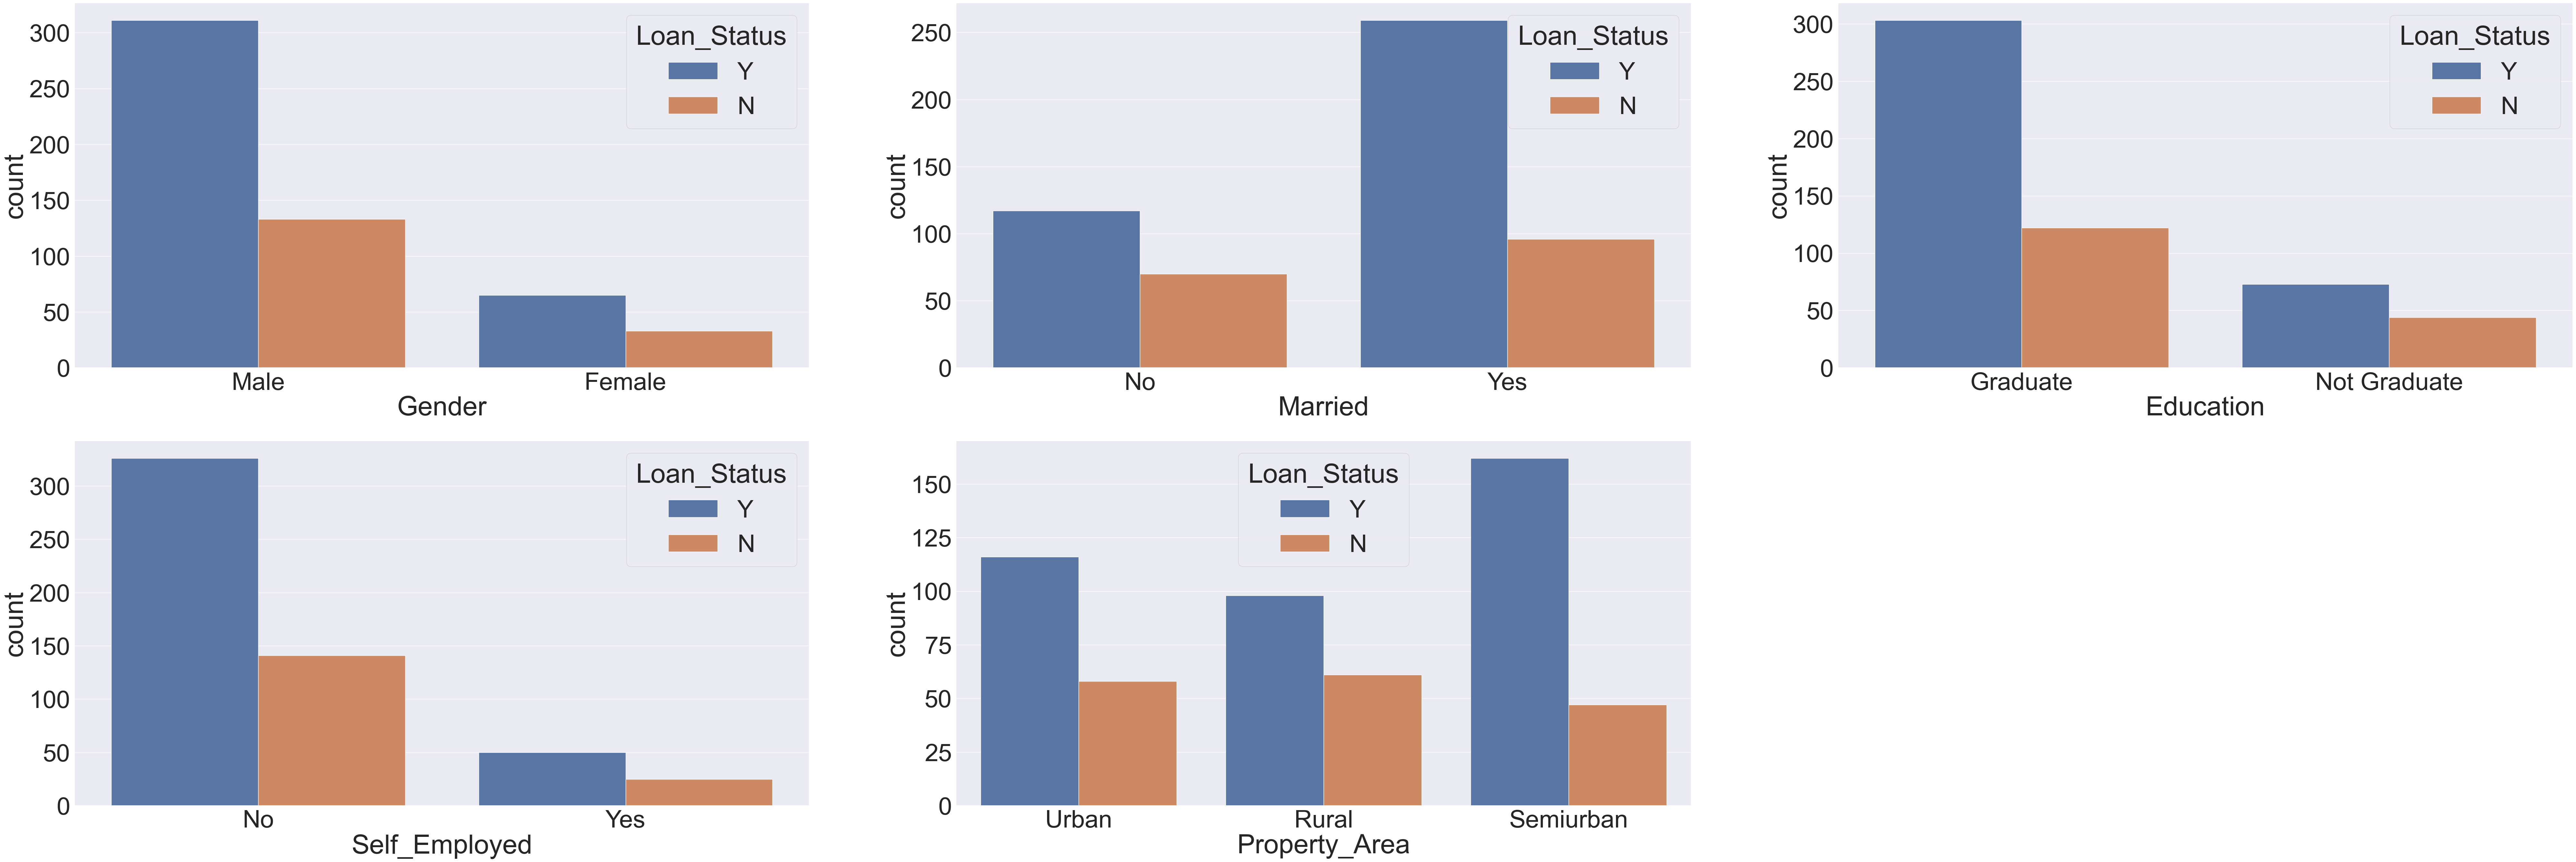

In [26]:
plt.figure(figsize = (100,50))
sns.set(font_scale=5)
plt.subplot(331)
sns.countplot(data=df,x='Gender',hue='Loan_Status')

plt.subplot(332)
sns.countplot(data=df,x='Married',hue='Loan_Status')

plt.subplot(333)
sns.countplot(data=df,x='Education',hue='Loan_Status')

plt.subplot(334)
sns.countplot(data=df,x='Self_Employed',hue='Loan_Status')

plt.subplot(335)
sns.countplot(data=df,x='Property_Area',hue='Loan_Status')

In [27]:
df['Loan_Status'].replace('Y',1,inplace=True)
df['Loan_Status'].replace('N',0,inplace=True)

C:\Users\dell\AppData\Local\Temp\ipykernel_2280\98866781.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Loan_Status'].replace('Y',1,inplace=True)
C:\Users\dell\AppData\Local\Temp\ipykernel_2280\98866781.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when 

In [28]:
df['Loan_Status'].value_counts()

Loan_Status
1    376
0    166
Name: count, dtype: int64

In [29]:
df['Gender'] = df.Gender.map({'Male':1,'Female':0})
df['Gender'].value_counts()

Gender
1    444
0     98
Name: count, dtype: int64

In [30]:
df.Married = df.Married.map({'Yes':1,'No':0})
df['Married'].value_counts()

Married
1    355
0    187
Name: count, dtype: int64

In [31]:
df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status,TotalIncome,TotalIncome_log
0,LP001002,1,0,0,Graduate,No,5849,0.0,146.412162,360.0,1.0,Urban,1,5849.0,8.674026
1,LP001003,1,1,1,Graduate,No,4583,1508.0,128.000000,360.0,1.0,Rural,0,6091.0,8.714568
2,LP001005,1,1,0,Graduate,Yes,3000,0.0,66.000000,360.0,1.0,Urban,1,3000.0,8.006368
3,LP001006,1,1,0,Not Graduate,No,2583,2358.0,120.000000,360.0,1.0,Urban,1,4941.0,8.505323
4,LP001008,1,0,0,Graduate,No,6000,0.0,141.000000,360.0,1.0,Urban,1,6000.0,8.699515


In [32]:
df.Dependents = df.Dependents.map({'0':0 , '1':1 , '2':2 , '3+':3})
df['Dependents'].value_counts()

Dependents
0    309
1     94
2     94
3     45
Name: count, dtype: int64

In [33]:
df.Self_Employed = df.Self_Employed.map({'Yes':1,'No':0})
df['Self_Employed'].value_counts()

Self_Employed
0    467
1     75
Name: count, dtype: int64

In [34]:
df.Education = df.Education.map({'Graduate':1,'Not Graduate':0})

In [35]:
df['Education'].value_counts()

Education
1    425
0    117
Name: count, dtype: int64

In [36]:
df.Property_Area = df.Property_Area.map({'Urban':2,'Rural':0,'Semiurban':1})
df['Property_Area'].value_counts()

Property_Area
1    209
2    174
0    159
Name: count, dtype: int64

In [37]:
df['LoanAmount'].value_counts()

LoanAmount
146.412162    19
120.000000    15
100.000000    14
110.000000    13
187.000000    12
              ..
61.000000      1
146.000000     1
142.000000     1
496.000000     1
253.000000     1
Name: count, Length: 195, dtype: int64

In [38]:
df['Loan_Amount_Term'].value_counts()

Loan_Amount_Term
360.0    464
180.0     38
480.0     13
300.0     12
84.0       4
120.0      3
240.0      3
60.0       2
36.0       2
12.0       1
Name: count, dtype: int64

In [39]:
df['Credit_History'].value_counts()

Credit_History
1.000000    425
0.000000     74
0.842199     43
Name: count, dtype: int64

In [40]:
df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status,TotalIncome,TotalIncome_log
0,LP001002,1,0,0,1,0,5849,0.0,146.412162,360.0,1.0,2,1,5849.0,8.674026
1,LP001003,1,1,1,1,0,4583,1508.0,128.000000,360.0,1.0,0,0,6091.0,8.714568
2,LP001005,1,1,0,1,1,3000,0.0,66.000000,360.0,1.0,2,1,3000.0,8.006368
3,LP001006,1,1,0,0,0,2583,2358.0,120.000000,360.0,1.0,2,1,4941.0,8.505323
4,LP001008,1,0,0,1,0,6000,0.0,141.000000,360.0,1.0,2,1,6000.0,8.699515


<Axes: >

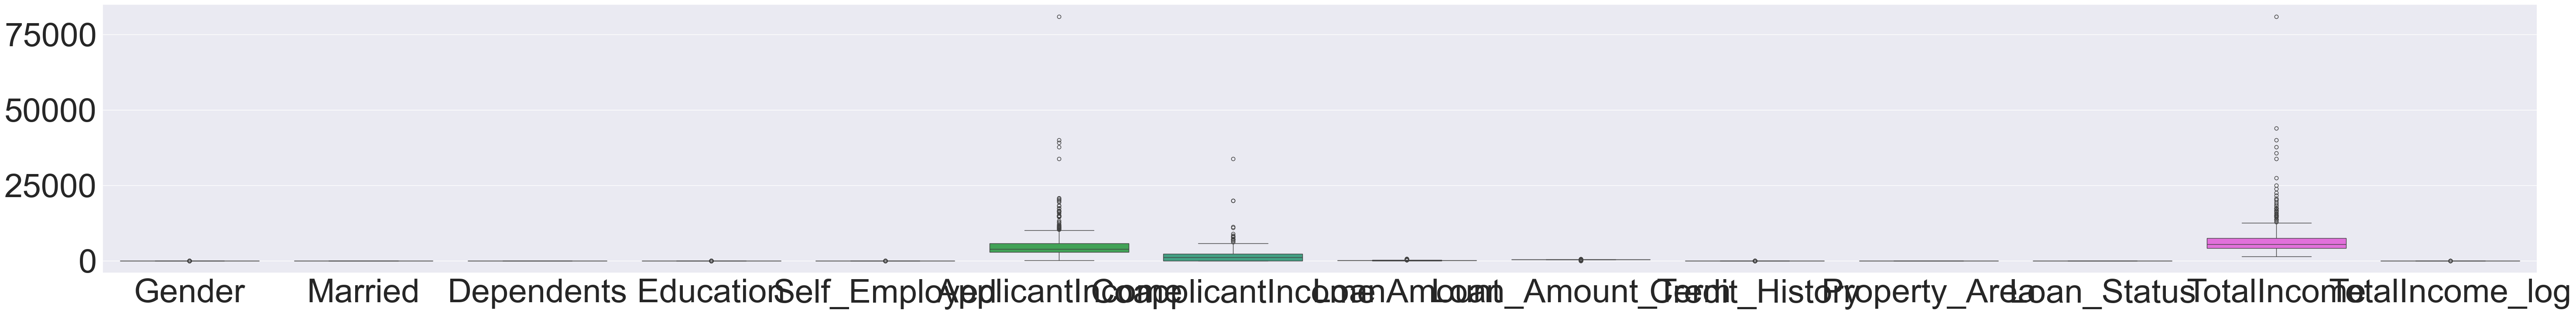

In [41]:
plt.figure(figsize=(72,8))
sns.boxplot(data = df )

Number of people who tool loan by gender
Gender
1    444
0     98
Name: count, dtype: int64


Text(0.5, 1.0, 'Number of People Who Took Loans by Gender')

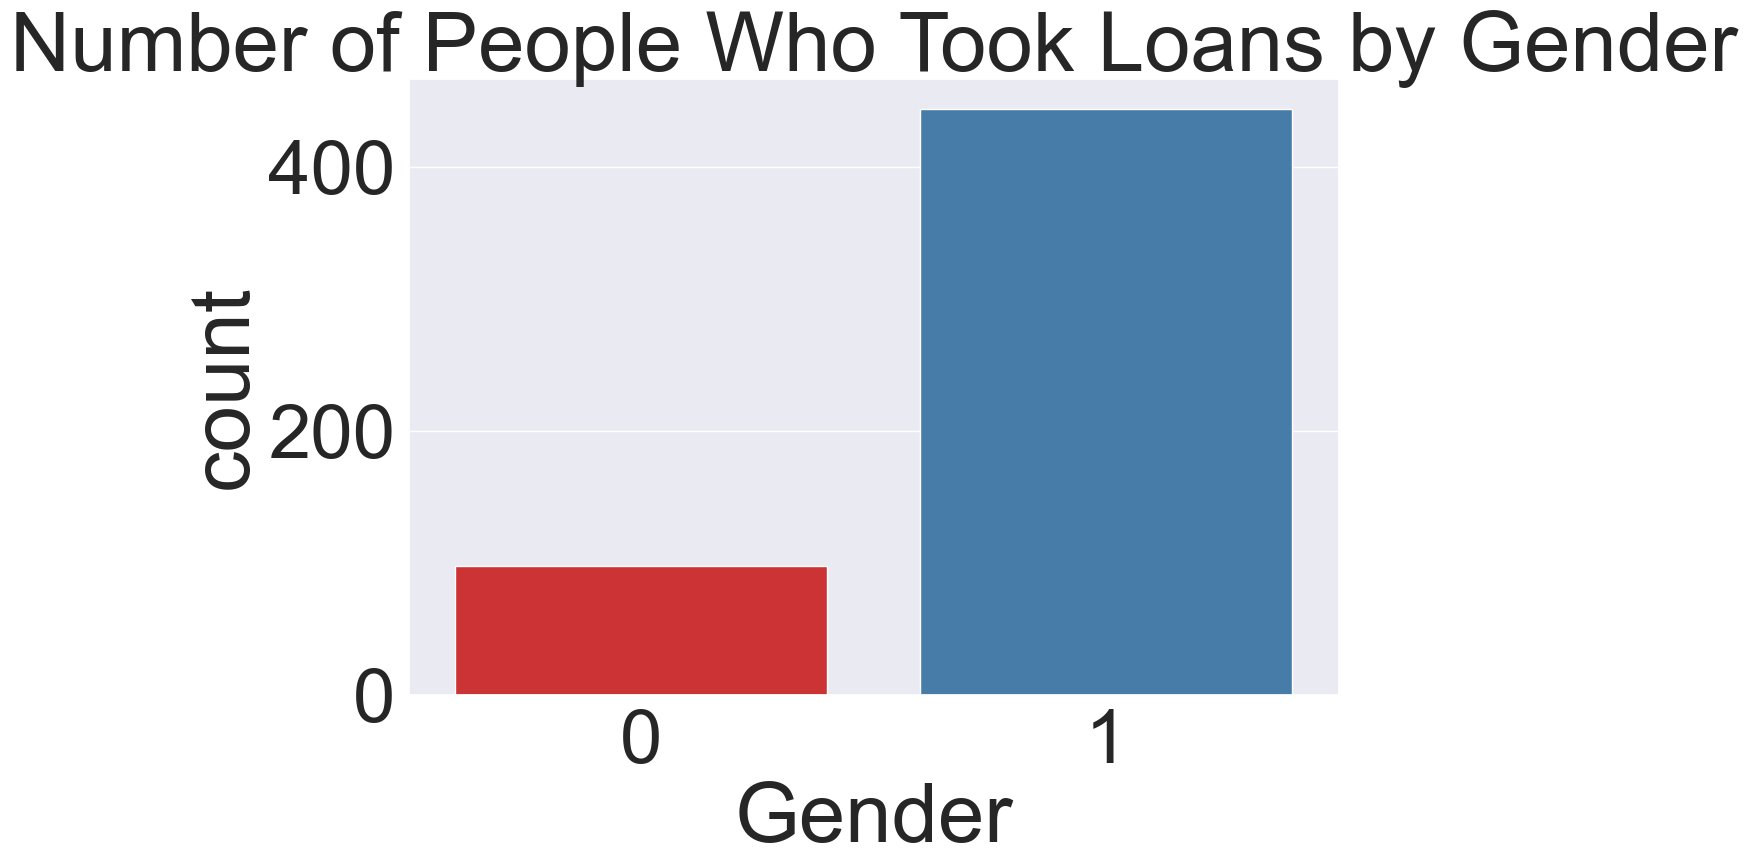

In [42]:
print("Number of people who tool loan by gender")
print(df['Gender'].value_counts())
plt.figure(figsize=(12,8))
sns.countplot(data = df ,x='Gender',hue='Gender', palette='Set1',legend=False)
plt.title("Number of People Who Took Loans by Gender")

Number of people who tool loan by Marriage
Married
1    355
0    187
Name: count, dtype: int64


Text(0.5, 1.0, 'Number of People Who Took Loans by Marriage')

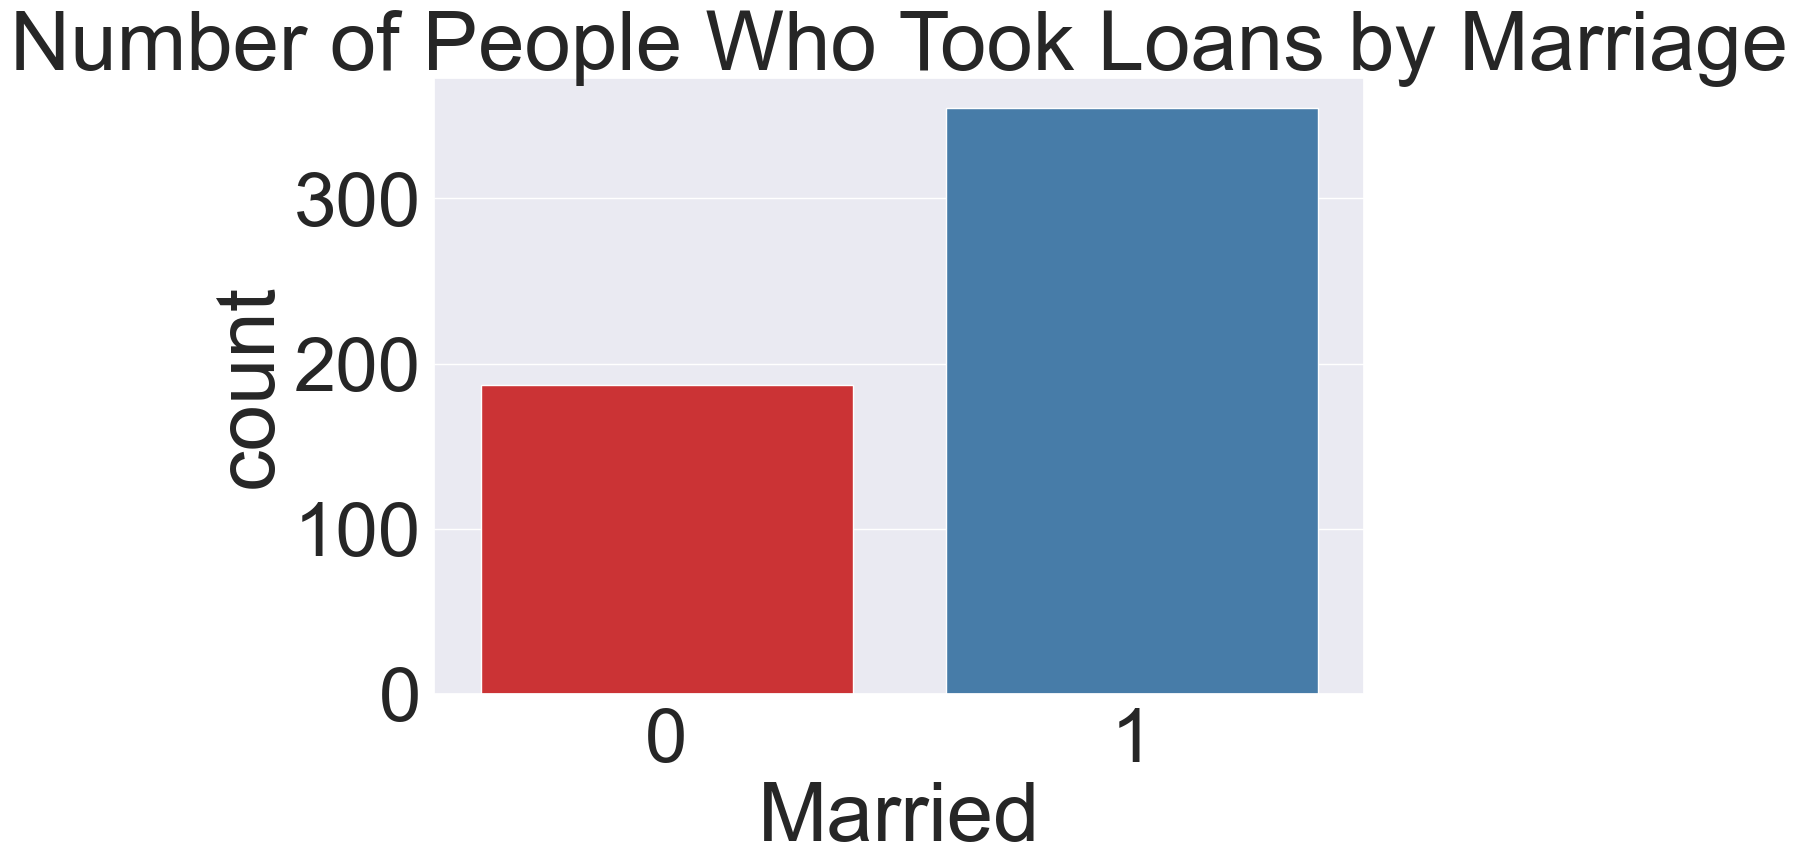

In [43]:
print("Number of people who tool loan by Marriage")
print(df['Married'].value_counts())
plt.figure(figsize=(12,8))
sns.countplot(data = df ,x='Married',hue='Married', palette='Set1',legend=False)
plt.title("Number of People Who Took Loans by Marriage")

<Axes: xlabel='ApplicantIncomelog', ylabel='Count'>

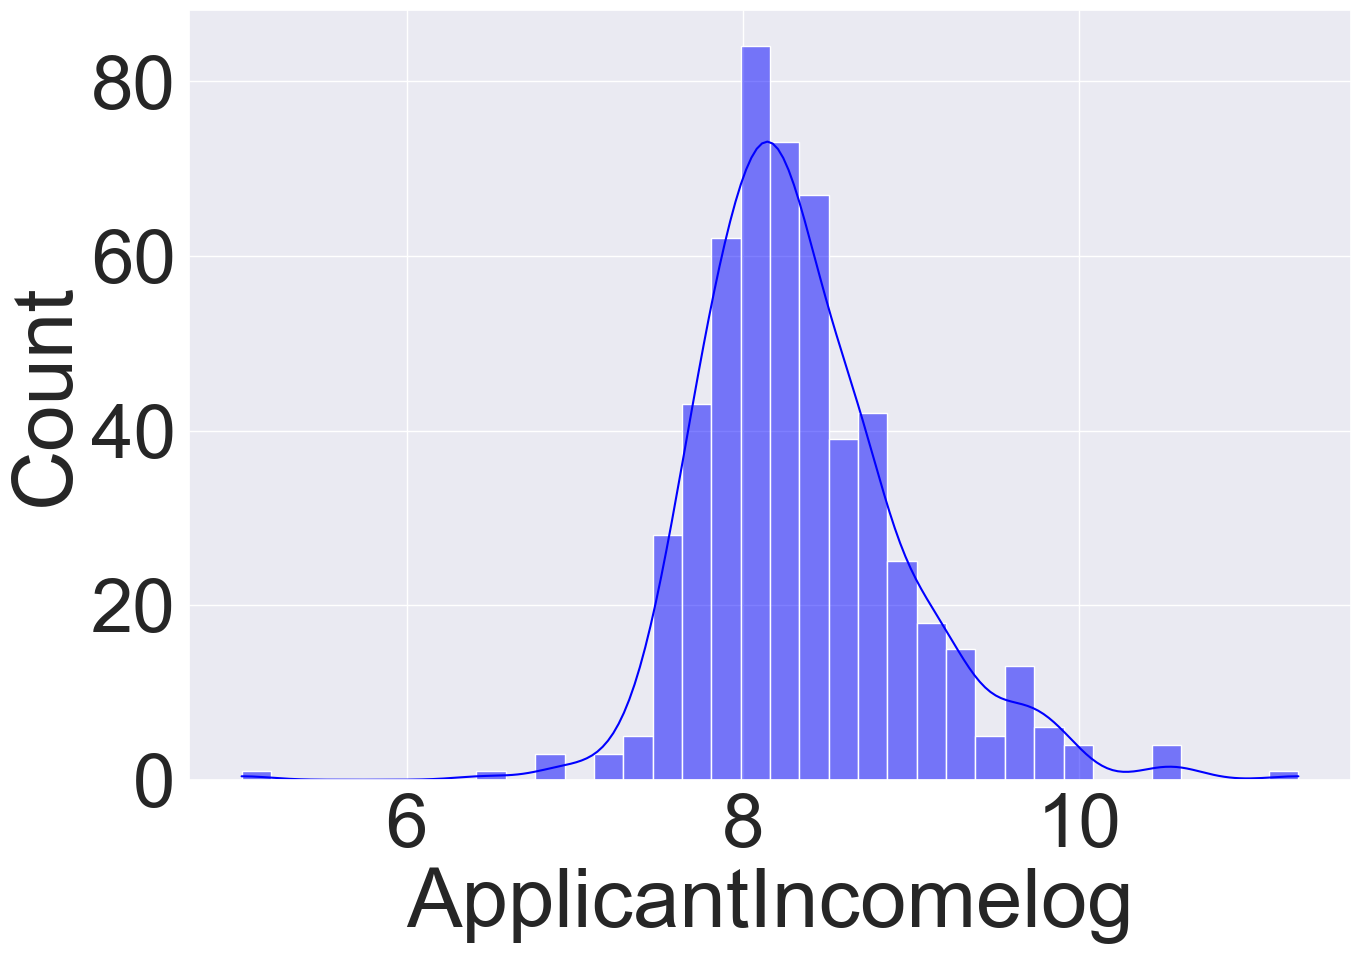

In [44]:
df['ApplicantIncomelog'] = np.log(df['ApplicantIncome'] + 1)

# Use a smaller figure size
plt.figure(figsize=(15, 10))

# Plot using seaborn's histplot for better customization
sns.histplot(df['ApplicantIncomelog'], kde=True, color='blue')

<Axes: xlabel='LoanAmountlog', ylabel='Count'>

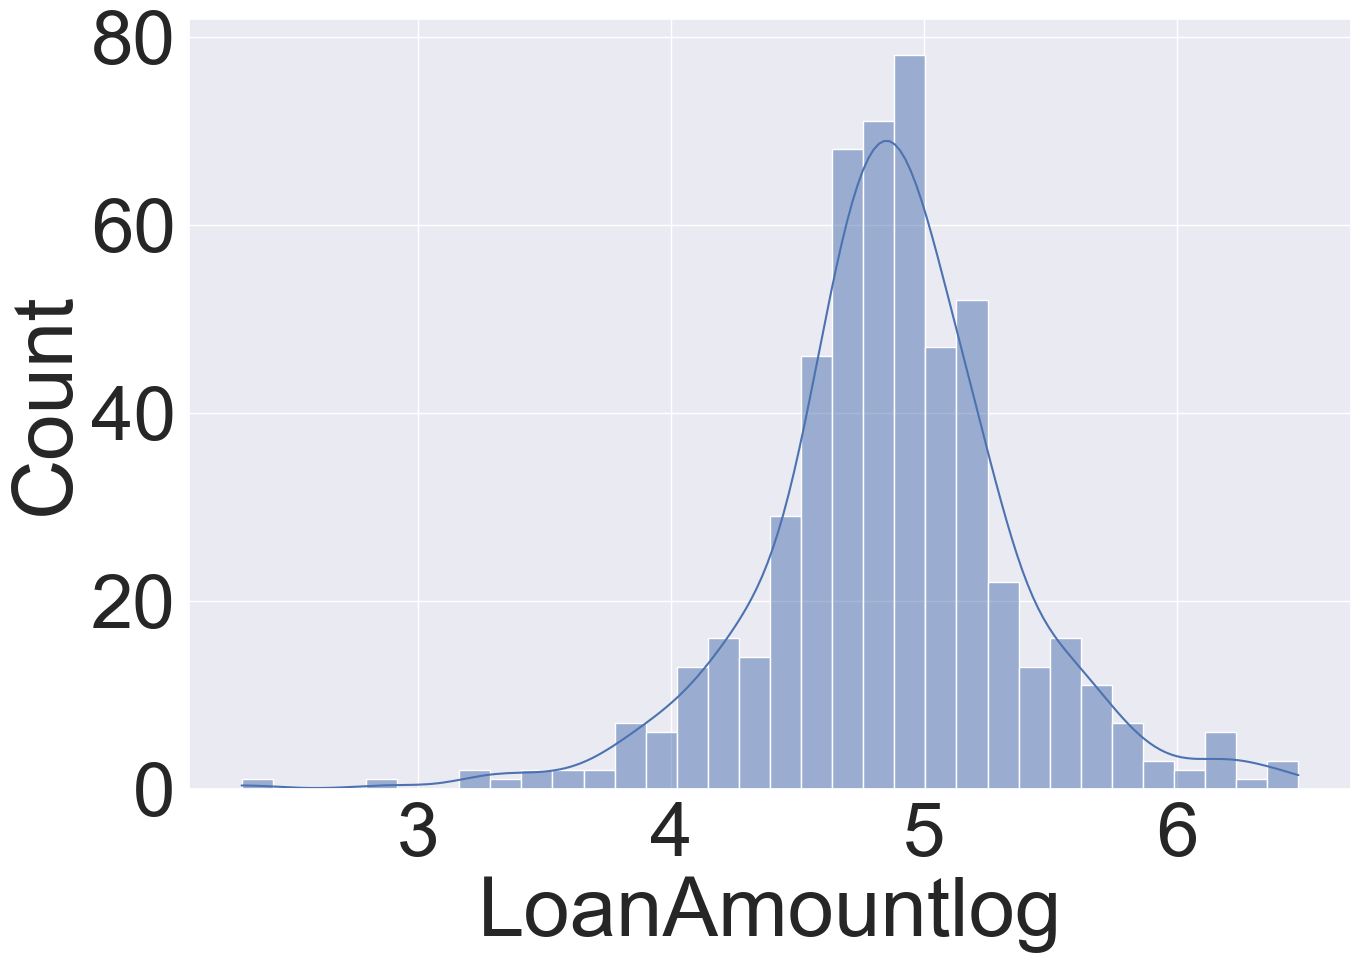

In [45]:
df['LoanAmountlog'] = np.log(df['LoanAmount'] + 1)

# Use a smaller figure size
plt.figure(figsize=(15, 10))

# Plot using seaborn's histplot for better customization
sns.histplot(df['LoanAmountlog'], kde=True)

<Axes: xlabel='Loan_Amount_Term_log', ylabel='Count'>

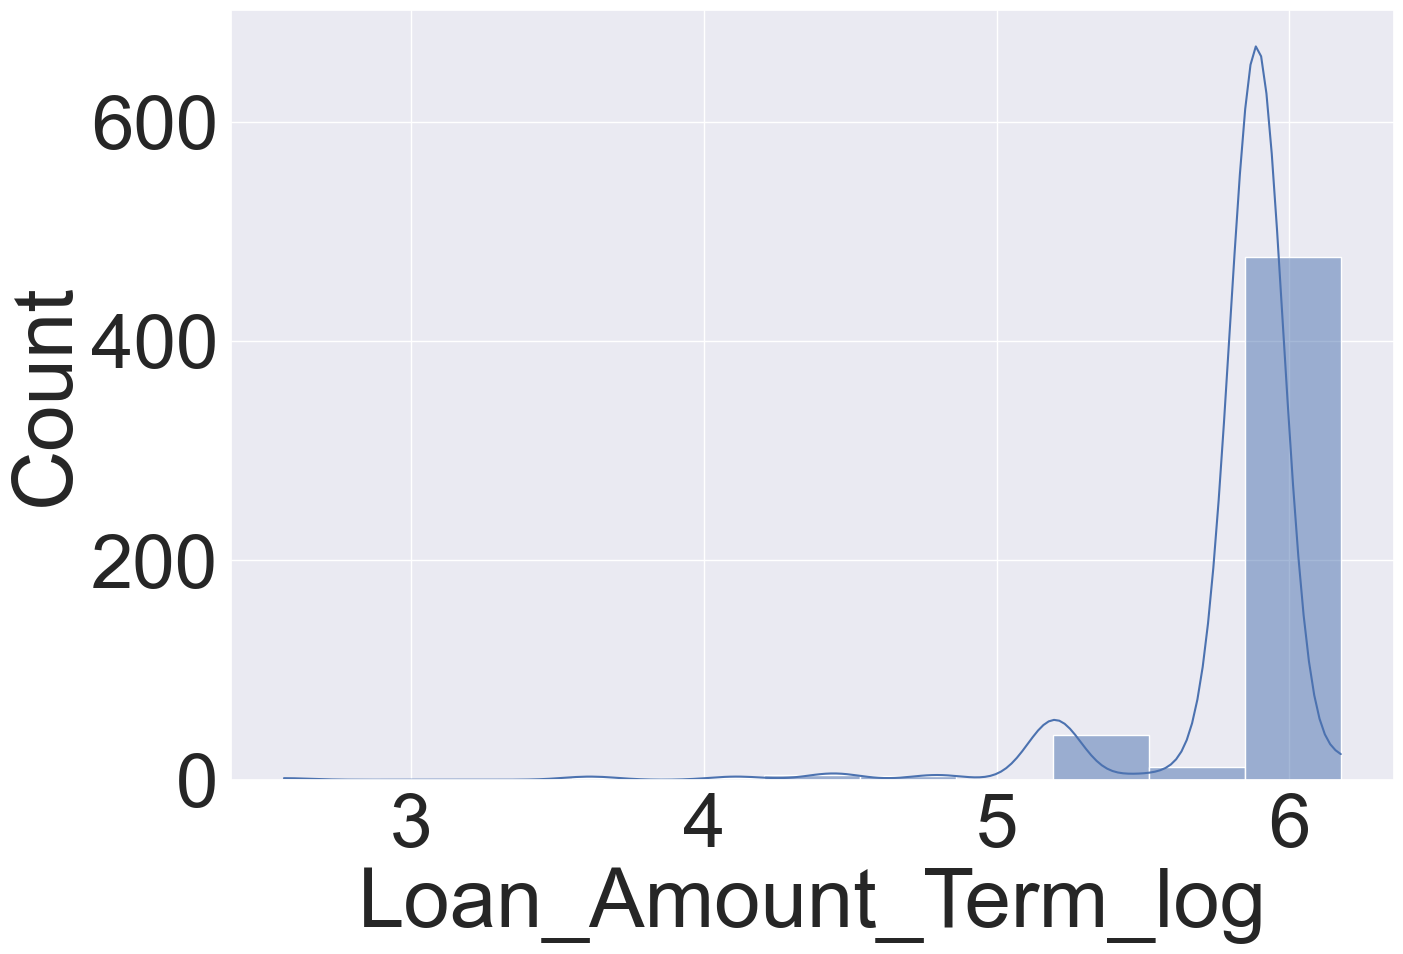

In [46]:
df['Loan_Amount_Term_log'] = np.log(df['Loan_Amount_Term'] + 1)
plt.figure(figsize=(15,10))
sns.histplot(df['Loan_Amount_Term_log'] , kde=True)

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status,TotalIncome,TotalIncome_log,ApplicantIncomelog,LoanAmountlog,Loan_Amount_Term_log
0,LP001002,1,0,0,1,0,5849,0.0,146.412162,360.0,1.0,2,1,5849.0,8.674026,8.674197,4.993232,5.888878
1,LP001003,1,1,1,1,0,4583,1508.0,128.000000,360.0,1.0,0,0,6091.0,8.714568,8.430327,4.859812,5.888878
2,LP001005,1,1,0,1,1,3000,0.0,66.000000,360.0,1.0,2,1,3000.0,8.006368,8.006701,4.204693,5.888878
3,LP001006,1,1,0,0,0,2583,2358.0,120.000000,360.0,1.0,2,1,4941.0,8.505323,7.857094,4.795791,5.888878
4,LP001008,1,0,0,1,0,6000,0.0,141.000000,360.0,1.0,2,1,6000.0,8.699515,8.699681,4.955827,5.888878


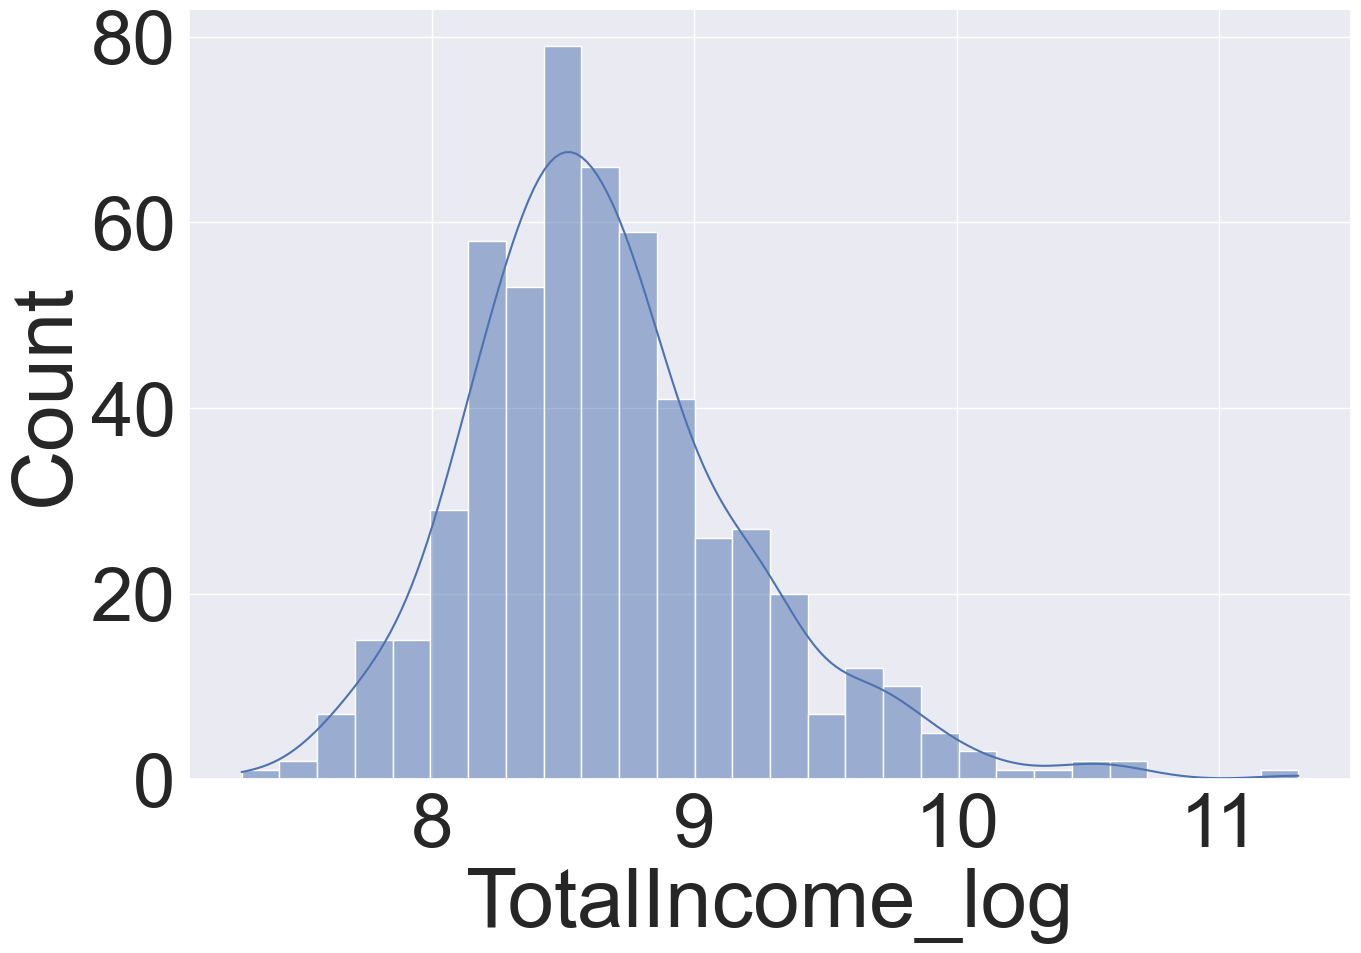

In [47]:
plt.figure(figsize=(15,10))
sns.histplot(df['TotalIncome_log'] , kde=True)
df.head()

In [48]:
##Drop unassisory colums
cols = ['ApplicantIncome' , 'CoapplicantIncome' , 'LoanAmount' , 'Loan_Amount_Term' , 'TotalIncome' , 'Loan_ID'] 
df = df.drop(columns = cols , axis=1)
df.head()

,Gender,Married,Dependents,Education,Self_Employed,Credit_History,Property_Area,Loan_Status,TotalIncome_log,ApplicantIncomelog,LoanAmountlog,Loan_Amount_Term_log
0,1,0,0,1,0,1.0,2,1,8.674026,8.674197,4.993232,5.888878
1,1,1,1,1,0,1.0,0,0,8.714568,8.430327,4.859812,5.888878
2,1,1,0,1,1,1.0,2,1,8.006368,8.006701,4.204693,5.888878
3,1,1,0,0,0,1.0,2,1,8.505323,7.857094,4.795791,5.888878
4,1,0,0,1,0,1.0,2,1,8.699515,8.699681,4.955827,5.888878


<Axes: >

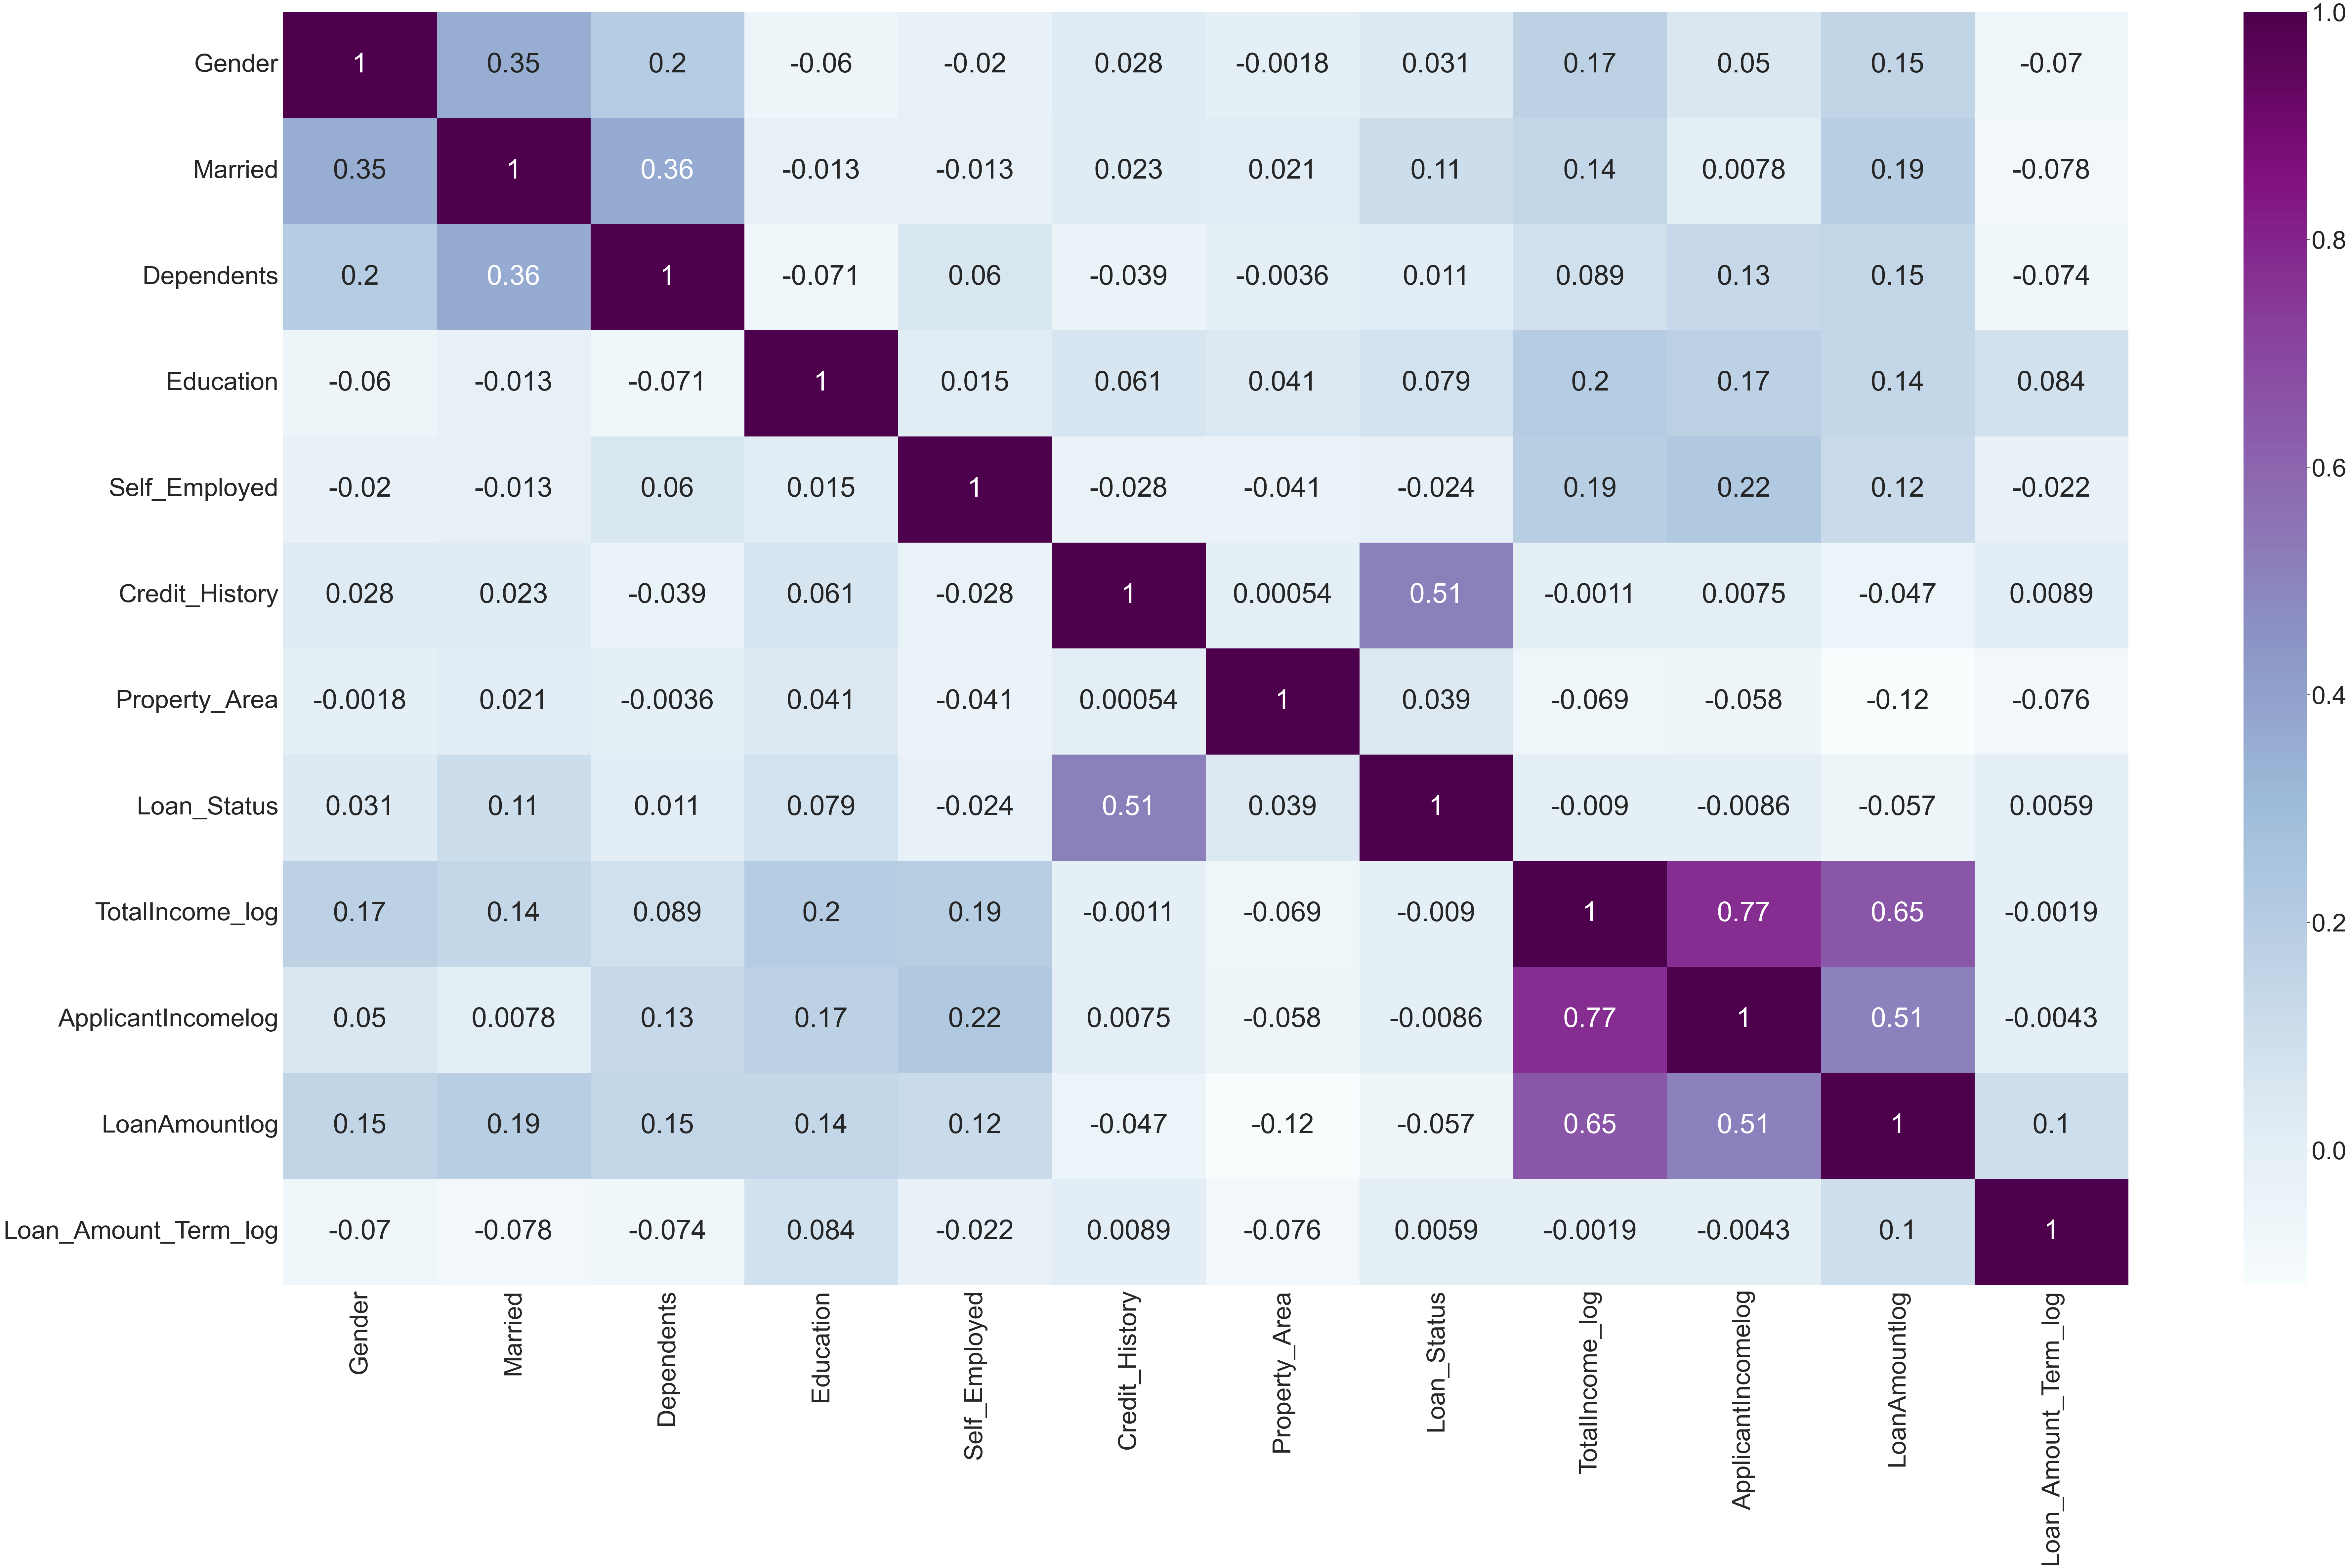

In [49]:
numeric_df = df.select_dtypes(include=['number'])
corr = numeric_df.corr()
corr
plt.figure(figsize=(90,50))
sns.heatmap(corr,annot=True,cmap='BuPu')
# df.info()

**Importing Packages for Classification algorithms**

In [50]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression

In [51]:
from sklearn import svm


In [52]:
from sklearn.tree import DecisionTreeClassifier

In [53]:
from sklearn.neighbors import KNeighborsClassifier

In [54]:
from sklearn import metrics

**Splitting the data into Train and Test set(Independent and Dependent Features)**

In [55]:
# x = df.iloc[1:541,1:12].values
# y = df.iloc[1:541,12].values

In [56]:
# x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.3,random_state=0)

In [57]:
data = df
x = df.drop(columns=['Loan_Status'] , axis=1)
y = df['Loan_Status']

In [58]:
from sklearn.model_selection import train_test_split , cross_val_score
from sklearn.metrics import accuracy_score , confusion_matrix
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier

In [59]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.25,random_state=42)

**random_state=42**:
random_state is a parameter that controls the randomness of the split.
Setting random_state=42 ensures that the split is reproducible. If you run the code multiple times with the same random_state, you will get the same split every time.
If you leave random_state out or set it to None, the split will be different each time you run the code, which might lead to different results (unless you want a random split each time).

**<h1 style="font-size: 20px;">Logistic Regression(LR)</h1>**

In [60]:
model1 = LogisticRegression()
model1.fit(x_train,y_train)
y_pred_model1 = model1.predict(x_test)
accuracy = accuracy_score(y_test , y_pred_model1)

In [61]:
accuracy*100

79.41176470588235

**Accuracy : the ratio of the correctaly predicted values to the total values**

In [62]:
score = cross_val_score(model1,x,y,cv = 5 )
score


array([0.81651376, 0.75229358, 0.77777778, 0.85185185, 0.81481481])

In [63]:
np.mean(score)*100

np.float64(80.26503567787971)

**Decission Tree Classifier**

In [64]:
model2 = DecisionTreeClassifier()
model2.fit(x_train , y_train)
y_pred_model2 = model2.predict(x_test)
accuracy = accuracy_score(y_pred_model2,y_test)
print("Accuracy of the decission tree model : ",accuracy*100)

Accuracy of the decission tree model :  69.85294117647058


In [65]:
score = cross_val_score(model2 , x,y,cv = 5 )
print("score of the Model2 after the cross validation is :  ",np.mean(score)*100)

score of the Model2 after the cross validation is :   72.8780156303092


**Random Forest Classifier**

In [66]:
model3 = RandomForestClassifier()
model3.fit(x_train , y_train)
y_pred_model3 = model3.predict(x_test)
accuracy = accuracy_score(y_pred_model3,y_test)
print("Accuracy of the Random Forest model : ",accuracy*100)

Accuracy of the Random Forest model :  79.41176470588235


**KNeighbor model** 

In [67]:
model4 = KNeighborsClassifier(n_neighbors=3)
model4.fit(x_train , y_train)
y_pred_model4 = model4.predict(x_test)
accuracy = accuracy_score(y_pred_model4,y_test)
print("Accuracy of KNeighbor model : ",accuracy*100)

Accuracy of KNeighbor model :  76.47058823529412


In [68]:
score = cross_val_score(model4,x,y,cv=3)
print("the Score after the cross validation of the KNeighbors model :  ",np.mean(score)*100)

the Score after the cross validation of the KNeighbors model :   71.58890935134029


In [69]:
df['Loan_Status' ].value_counts()

Loan_Status
1    376
0    166
Name: count, dtype: int64

In [70]:
from sklearn.metrics import classification_report

def generate_classification_report(model_name,y_test,y_pred):
  report = classification_report(y_test,y_pred)
  print(f"Classification Report For {model_name}:\n{report}\n")

generate_classification_report(model1,y_test,y_pred_model1)
generate_classification_report(model2,y_test,y_pred_model2)
generate_classification_report(model3,y_test,y_pred_model3)
generate_classification_report(model4,y_test,y_pred_model4)

Classification Report For LogisticRegression():
              precision    recall  f1-score   support

           0       0.80      0.40      0.53        40
           1       0.79      0.96      0.87        96

    accuracy                           0.79       136
   macro avg       0.80      0.68      0.70       136
weighted avg       0.80      0.79      0.77       136


Classification Report For DecisionTreeClassifier():
              precision    recall  f1-score   support

           0       0.49      0.55      0.52        40
           1       0.80      0.76      0.78        96

    accuracy                           0.70       136
   macro avg       0.65      0.66      0.65       136
weighted avg       0.71      0.70      0.70       136


Classification Report For RandomForestClassifier():
              precision    recall  f1-score   support

           0       0.73      0.47      0.58        40
           1       0.81      0.93      0.86        96

    accuracy                

In [71]:
# pip install -U imbalanced-learn


In [72]:
from imblearn.over_sampling import RandomOverSampler


In [73]:
oversample = RandomOverSampler(random_state=42)
X_resampled, y_resampled = oversample.fit_resample(x,y)

df_resampled = pd.concat([pd.DataFrame(X_resampled,columns=x.columns),pd.Series(y_resampled,name="Loan_status")],axis=1)

In [74]:
y_resampled

0      1
1      0
2      1
3      1
4      1
      ..
747    0
748    0
749    0
750    0
751    0
Name: Loan_Status, Length: 752, dtype: int64

In [75]:
y_resampled.value_counts()

Loan_Status
1    376
0    376
Name: count, dtype: int64

In [76]:
X_resampled_train, X_resampled_test, y_resampled_train, y_resampled_test = train_test_split(X_resampled,y_resampled,test_size = 0.25,random_state=42)

In [77]:
## Logistic Regression
model1 = LogisticRegression()
model1.fit(X_resampled_train,y_resampled_train)
y_pred_model1 = model1.predict(X_resampled_test)
accuracy = accuracy_score(y_resampled_test,y_pred_model1)
accuracy*100

68.08510638297872

In [78]:
## Decision Tree Classifier

model2 = DecisionTreeClassifier()
model2.fit(X_resampled_train,y_resampled_train)
y_pred_model2 = model2.predict(X_resampled_test)
accuracy = accuracy_score(y_resampled_test,y_pred_model2)
print("Accuracy score of Decision Tree: ", accuracy*100)

Accuracy score of Decision Tree:  83.51063829787235


In [79]:
## Random Forest Classifier
model3 = RandomForestClassifier()
model3.fit(X_resampled_train,y_resampled_train)
y_pred_model3 = model3.predict(X_resampled_test)
accuracy = accuracy_score(y_resampled_test,y_pred_model3)
print("Accuracy score of Random Forest: ", accuracy*100)

Accuracy score of Random Forest:  88.82978723404256


In [80]:
#KNearestNeighbors model
model4 = KNeighborsClassifier(n_neighbors=3)
model4.fit(X_resampled_train,y_resampled_train)
y_pred_model4 = model4.predict(X_resampled_test)
accuracy = accuracy_score(y_resampled_test,y_pred_model4)
print("Accuracy score of KNeighbors: ", accuracy*100)

Accuracy score of KNeighbors:  73.40425531914893


In [81]:
from sklearn.metrics import classification_report

def generate_classification_report(model_name,y_test,y_pred):
  report = classification_report(y_test,y_pred)
  print(f"Classification Report For {model_name}:\n{report}\n")

generate_classification_report(model1,y_resampled_test,y_pred_model1)
generate_classification_report(model2,y_resampled_test,y_pred_model2)
generate_classification_report(model3,y_resampled_test,y_pred_model3)
generate_classification_report(model4,y_resampled_test,y_pred_model4)

Classification Report For LogisticRegression():
              precision    recall  f1-score   support

           0       0.83      0.51      0.63       101
           1       0.61      0.87      0.72        87

    accuracy                           0.68       188
   macro avg       0.72      0.69      0.68       188
weighted avg       0.72      0.68      0.67       188


Classification Report For DecisionTreeClassifier():
              precision    recall  f1-score   support

           0       0.84      0.85      0.85       101
           1       0.83      0.82      0.82        87

    accuracy                           0.84       188
   macro avg       0.83      0.83      0.83       188
weighted avg       0.84      0.84      0.84       188


Classification Report For RandomForestClassifier():
              precision    recall  f1-score   support

           0       0.94      0.84      0.89       101
           1       0.84      0.94      0.89        87

    accuracy                

In [82]:
# Example test input (one row of data)
test_input = [[1, 0, 2, 1, 0, 1.0, 2, 8.912411, 8.450641, 5.049856, 5.888878]]

# Make a prediction using the trained model
predicted_label = model3.predict(test_input)

# Print the predicted label
print("Predicted Loan Status:", "Approved" if predicted_label[0] == 1 else "Not Approved")


Predicted Loan Status: Approved


C:\sklearn-env\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


In [83]:
import pickle 

In [84]:
pickle.dump(model3 , open('PredictLoan_Model.pkl' , 'wb'))

In [85]:
pickled_model = pickle.load(open('PredictLoan_Model.pkl' , 'rb'))

In [86]:
pickled_model.predict(test_input)
# Print the predicted label
print("Predicted Loan Status:", "Approved" if predicted_label[0] == 1 else "Not Approved")

Predicted Loan Status: Approved


C:\sklearn-env\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(
